# Styles and Communities

In [1]:
import pandas as pd
from shapely import wkt
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import HTML, Image
import glob
import numpy as np

In [2]:
constructivism = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/30-style_constructivism.csv")
symbolism = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/51-style_symbolism.csv")
interwar_objectivity = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/29-style_interwar_objectivity.csv")
surrealism = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/26-style_surrealism.csv")
fauvism = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/24-style_fauvism.csv")
divisionism = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/23-style_divisionism.csv")
cubism = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/21-style_cubism.csv")
geometric_abstraction = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/22-style_geometric_abstraction.csv")
impressionism = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/20-style_impressionism-2.csv")
expressionism = pd.read_csv("/Users/carboni/Documents/UNIGE/pynotebook/RDF-VC/CAA 23/csv/input/25-style_expressionism.csv")

In [3]:
impressionism['type'] = 'impressionism'
symbolism['type'] = 'symbolism'
constructivism['type'] = 'constructivism'
interwar_objectivity['type'] = 'interwar_objectivity'
surrealism['type'] = 'surrealism'
fauvism['type'] = 'fauvism'
divisionism['type'] = 'divisionism'
cubism['type'] = 'cubism'
geometric_abstraction['type'] = 'geometric_abstraction'
expressionism['type'] = 'expressionism'

In [4]:
df_all = pd.concat([impressionism, symbolism, constructivism, interwar_objectivity, expressionism, surrealism, fauvism, divisionism, cubism, geometric_abstraction ])

In [5]:
df_all.drop(['group_tags','group_name','notice', 'canvas_number'], axis=1, inplace=True)
df_all = df_all.drop_duplicates(subset=['image_url'])

In [6]:
df_all['year'] = pd.DatetimeIndex(df_all['Date']).year

In [7]:
pre50 = (df_all['year'] < 1950)
df_pre_1950 = df_all.loc[pre50]

## impressionism

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/3407055461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impressionism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)


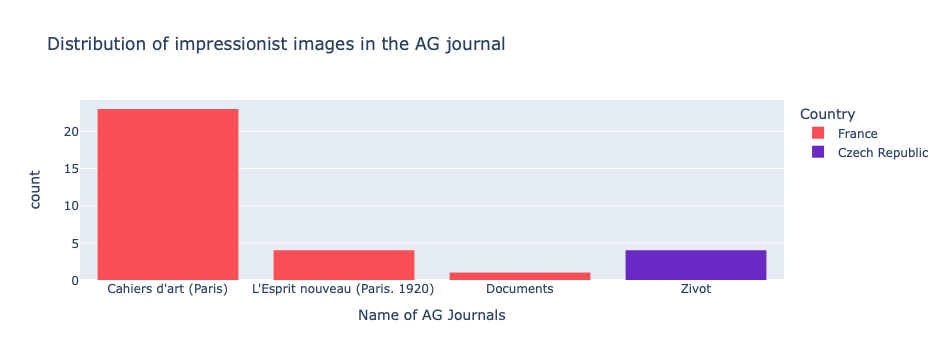

In [8]:
impressionism['count_journal'] = impressionism.groupby(['Title'])['manifest_url'].transform('count')
impressionism['year'] = pd.DatetimeIndex(impressionism['Date']).year
impressionism_ag = impressionism.loc[impressionism['Journal Type'] == 'Avant-garde Journal']

impressionism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)

top_impressionism_ag = impressionism_ag[impressionism_ag['count_journal'] >= 2]

fig = px.histogram(impressionism_ag,  x='Title', color="Country",
            title="Distribution of impressionist images in the AG journal",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/impressionism_journal.png",  scale=3, width=2000) 
fig.write_html('viz/style/impressionism_journal.html', auto_open=False)

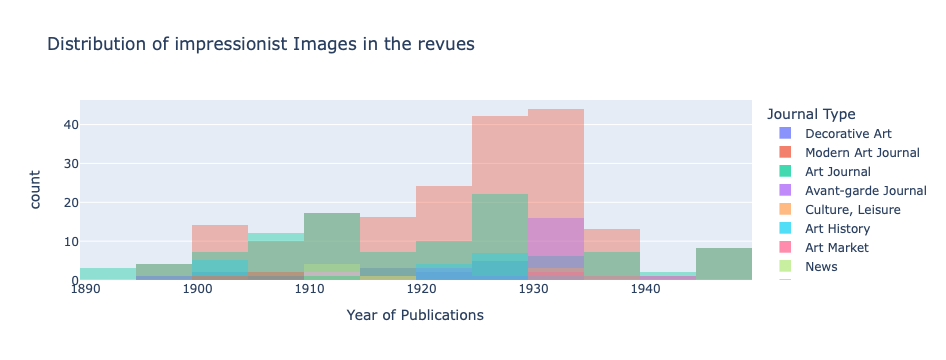

In [9]:
impressionism['year'] = pd.DatetimeIndex(impressionism['Date']).year
impressionism = impressionism.drop_duplicates(subset=['image_url'])
pre50 = (impressionism['year'] < 1950)
impressionism_pre_1950 = impressionism.loc[pre50]

fig = px.histogram(impressionism_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of impressionist Images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_impressionism.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_impressionism.html', auto_open=False)

## Symbolism

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/2774271513.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



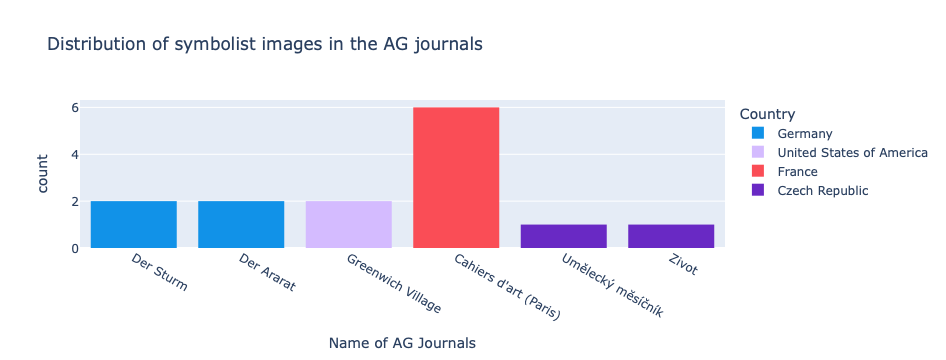

In [10]:
symbolism['count_journal'] = symbolism.groupby(['Title'])['manifest_url'].transform('count')
symbolism_ag = symbolism.loc[symbolism['Journal Type'] == 'Avant-garde Journal']

symbolism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)

top_symbolism_ag = symbolism_ag[symbolism_ag['count_journal'] >= 2]

fig = px.histogram(symbolism_ag,  x='Title', color="Country",
            title="Distribution of symbolist images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/Symbolism_journal.png",  scale=3, width=2000) 
fig.write_html('viz/style/Symbolism_journal.html', auto_open=False)

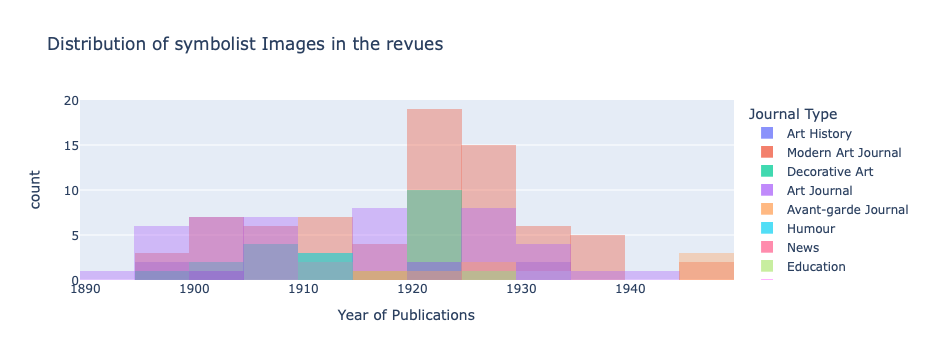

In [11]:
symbolism['year'] = pd.DatetimeIndex(symbolism['Date']).year
symbolism = symbolism.drop_duplicates(subset=['image_url'])
pre50 = (symbolism['year'] < 1950)
symbolism_pre_1950 = symbolism.loc[pre50]

fig = px.histogram(symbolism_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of symbolist Images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_symbolist.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_symbolist.html', auto_open=False)

## Constructivism

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/3908113704.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



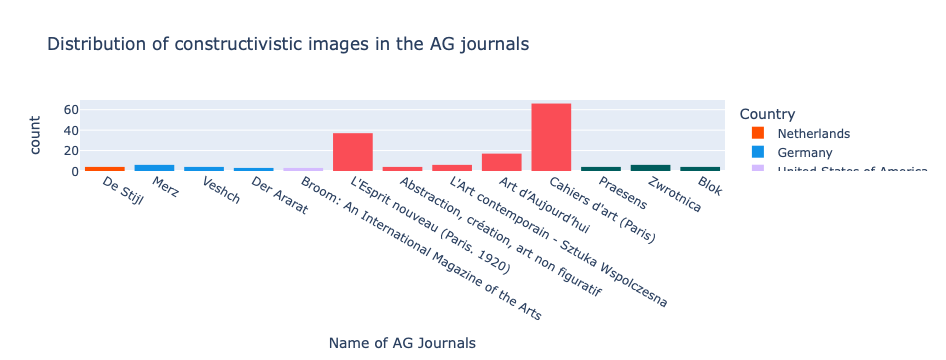

In [12]:
constructivism['count_journal'] = constructivism.groupby(['Title'])['manifest_url'].transform('count')
constructivism_ag = constructivism.loc[constructivism['Journal Type'] == 'Avant-garde Journal']

constructivism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)


top_constructivism_ag = constructivism_ag[constructivism_ag['count_journal'] >= 3]

fig = px.histogram(top_constructivism_ag,  x='Title', color="Country",
            title="Distribution of constructivistic images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/constructivism_j.png",  scale=3, width=2000) 
fig.write_html('viz/style/constructivism_j.html', auto_open=False)

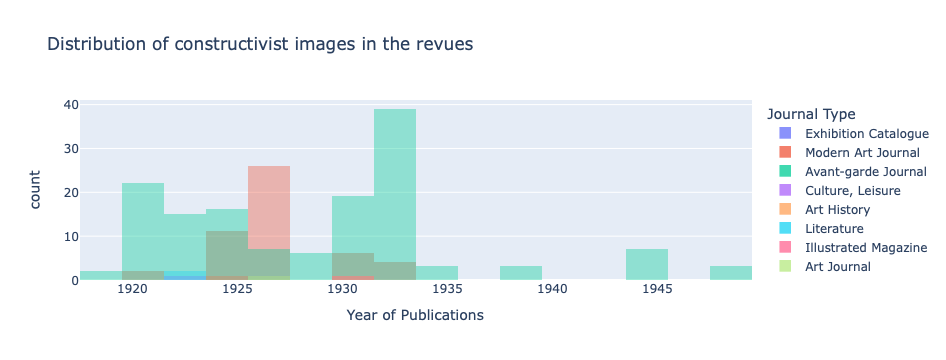

In [13]:
constructivism['year'] = pd.DatetimeIndex(constructivism['Date']).year
constructivism = constructivism.drop_duplicates(subset=['image_url'])
pre50 = (constructivism['year'] < 1950)
constructivism_pre_1950 = constructivism.loc[pre50]

fig = px.histogram(constructivism_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of constructivist images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_constructivism.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_constructivism.html', auto_open=False)

## Interwar Objectivity

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/1657960037.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



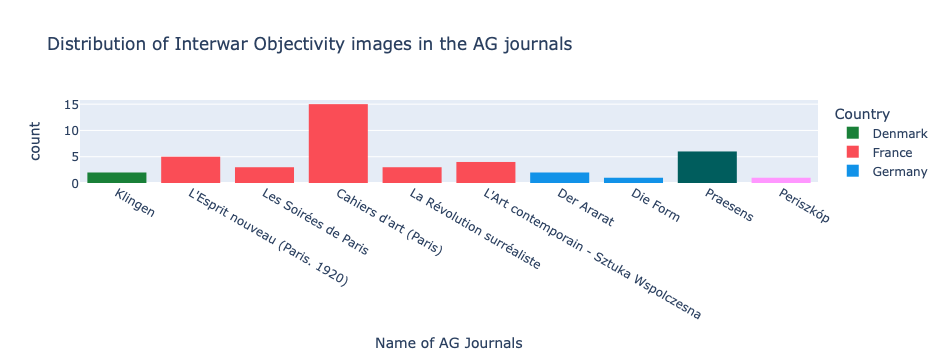

In [14]:
interwar_objectivity['count_journal'] = interwar_objectivity.groupby(['Title'])['manifest_url'].transform('count')
interwar_objectivity_ag = interwar_objectivity.loc[interwar_objectivity['Journal Type'] == 'Avant-garde Journal']
interwar_objectivity_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)


fig = px.histogram(interwar_objectivity_ag,  x='Title', color="Country",
            title="Distribution of Interwar Objectivity images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/interwar_objectivity_j.png",  scale=3, width=2000) 
fig.write_html('viz/style/interwar_objectivity_j.html', auto_open=False)

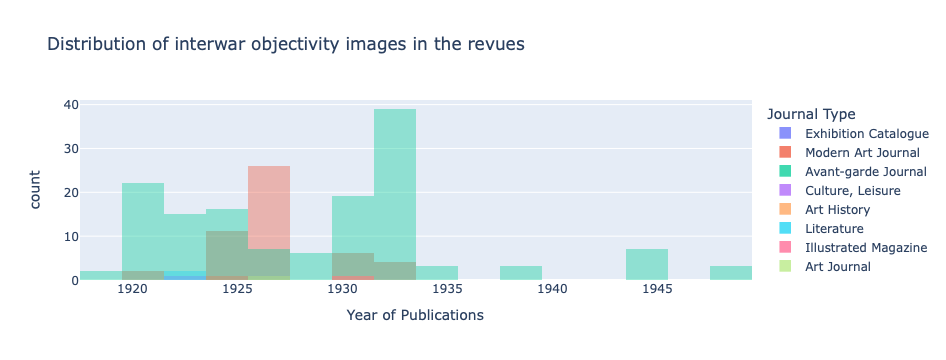

In [15]:
interwar_objectivity['year'] = pd.DatetimeIndex(interwar_objectivity['Date']).year
interwar_objectivity = constructivism.drop_duplicates(subset=['image_url'])
pre50 = (interwar_objectivity['year'] < 1950)
interwar_objectivity_pre_1950 = interwar_objectivity.loc[pre50]

fig = px.histogram(interwar_objectivity_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of interwar objectivity images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_interwar_objectivity.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_interwar_objectivity.html', auto_open=False)

## Surrealism

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/2665971547.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



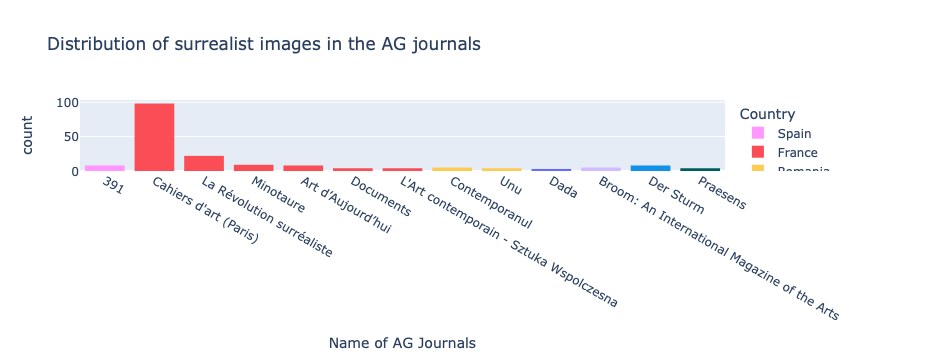

In [16]:
surrealism['count_journal'] = surrealism.groupby(['Title'])['manifest_url'].transform('count')
surrealism_ag = surrealism.loc[surrealism['Journal Type'] == 'Avant-garde Journal']

surrealism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)

top_surrealism_ag = surrealism_ag[surrealism_ag['count_journal'] >= 3]

fig = px.histogram(top_surrealism_ag,  x='Title', color="Country",
            title="Distribution of surrealist images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/surrealism_j.png",  scale=3, width=2000) 
fig.write_html('viz/style/surrealism_j.html', auto_open=False)

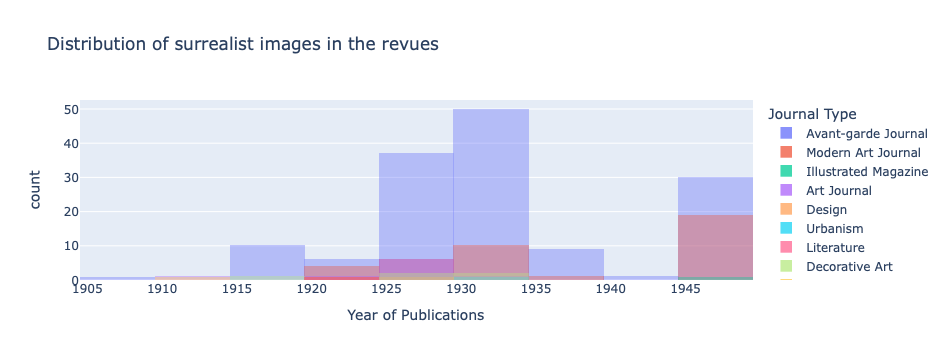

In [17]:
surrealism['year'] = pd.DatetimeIndex(surrealism['Date']).year
surrealism = surrealism.drop_duplicates(subset=['image_url'])
pre50 = (surrealism['year'] < 1950)
surrealism_pre_1950 = surrealism.loc[pre50]

fig = px.histogram(surrealism_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of surrealist images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_surrealism.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_surrealism.html', auto_open=False)

## Fauvism

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/34179025.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



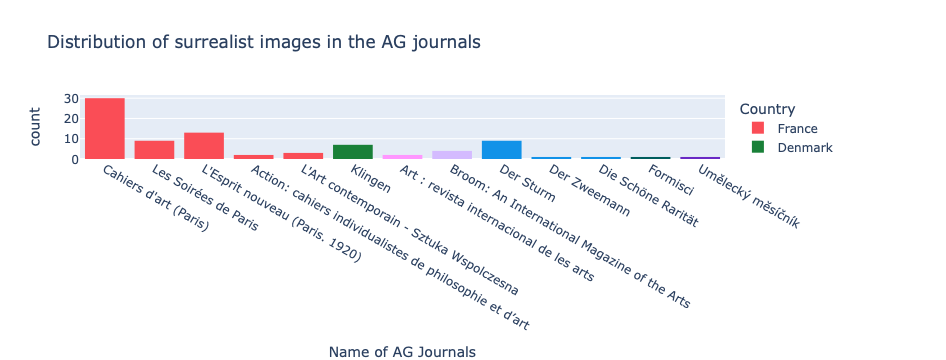

In [18]:
fauvism['count_journal'] = fauvism.groupby(['Title'])['manifest_url'].transform('count')
fauvism_ag = fauvism.loc[fauvism['Journal Type'] == 'Avant-garde Journal']

fauvism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)

top_fauvism_ag = fauvism_ag[fauvism_ag['count_journal'] >= 3]

fig = px.histogram(fauvism_ag,  x='Title', color="Country",
            title="Distribution of surrealist images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/fauvism_j.png",  scale=3, width=2000) 
fig.write_html('viz/style/fauvism_j.html', auto_open=False)

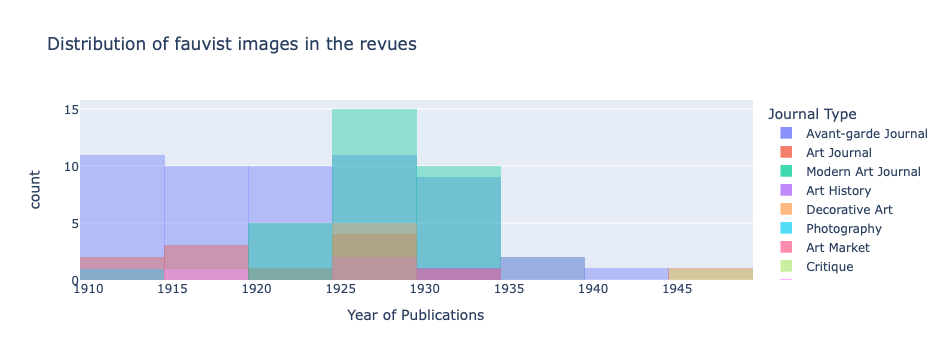

In [19]:
fauvism['year'] = pd.DatetimeIndex(fauvism['Date']).year
fauvism = fauvism.drop_duplicates(subset=['image_url'])
pre50 = (fauvism['year'] < 1950)
fauvism_pre_1950 = fauvism.loc[pre50]

fig = px.histogram(fauvism_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of fauvist images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_fauvism.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_fauvism.html', auto_open=False)

## Divisionism

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/2934408149.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



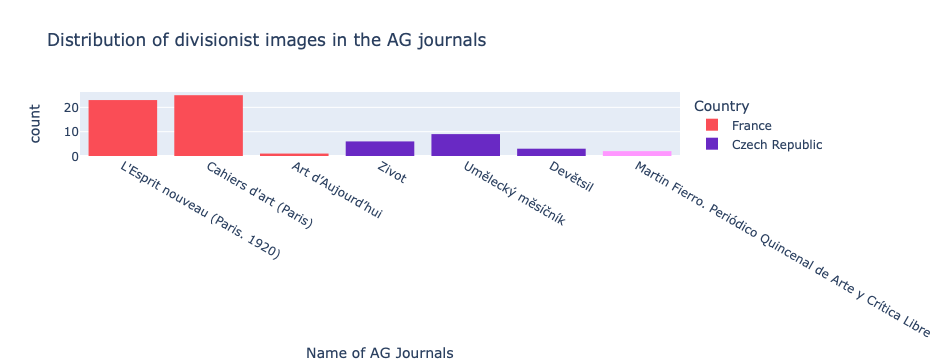

In [20]:
divisionism['count_journal'] = divisionism.groupby(['Title'])['manifest_url'].transform('count')
divisionism_ag = divisionism.loc[divisionism['Journal Type'] == 'Avant-garde Journal']

divisionism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)

top_divisionism_ag = divisionism_ag[divisionism_ag['count_journal'] >= 3]

fig = px.histogram(divisionism_ag,  x='Title', color="Country",
            title="Distribution of divisionist images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/divisionism_j.png",  scale=3, width=2000) 
fig.write_html('viz/style/divisionism_j.html', auto_open=False)

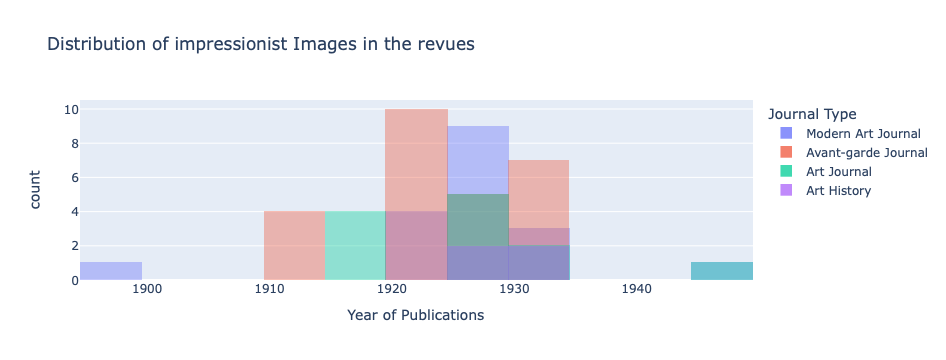

In [21]:
divisionism['year'] = pd.DatetimeIndex(divisionism['Date']).year

divisionism = divisionism.drop_duplicates(subset=['image_url'])
pre50 = (divisionism['year'] < 1950)
divisionism_pre_1950 = divisionism.loc[pre50]

fig = px.histogram(divisionism_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of impressionist Images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_impressionism.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_impressionism.html', auto_open=False)

## Cubism

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/1297473610.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



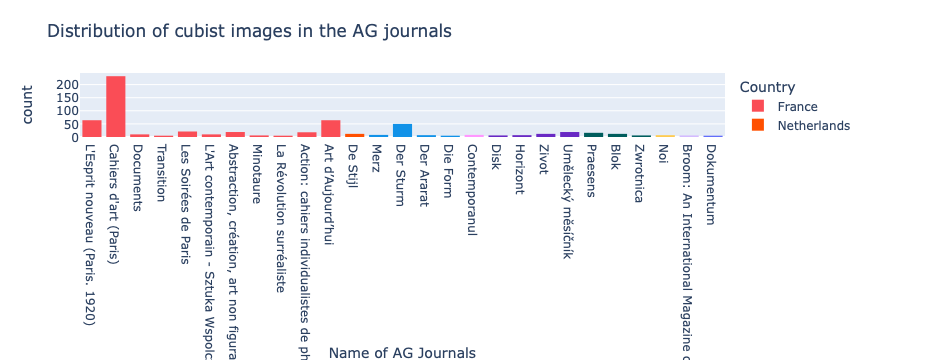

In [22]:
cubism['count_journal'] = cubism.groupby(['Title'])['manifest_url'].transform('count')
cubism_ag = cubism.loc[cubism['Journal Type'] == 'Avant-garde Journal']

cubism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)

top_cubism_ag = cubism_ag[cubism_ag['count_journal'] >= 4]

fig = px.histogram(top_cubism_ag,  x='Title', color="Country",
            title="Distribution of cubist images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/cubism_j.png",  scale=3, width=2000) 
fig.write_html('viz/style/cubism_j.html', auto_open=False)

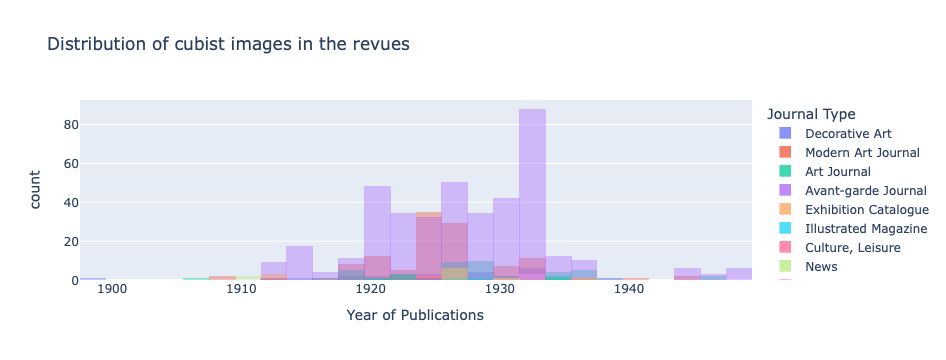

In [23]:
cubism['year'] = pd.DatetimeIndex(cubism['Date']).year
cubism = cubism.drop_duplicates(subset=['image_url'])
pre50 = (cubism['year'] < 1950)
cubism_pre_1950 = cubism.loc[pre50]

fig = px.histogram(cubism_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of cubist images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_cubism.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_cubism.html', auto_open=False)

## Expressionism

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/2637900615.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



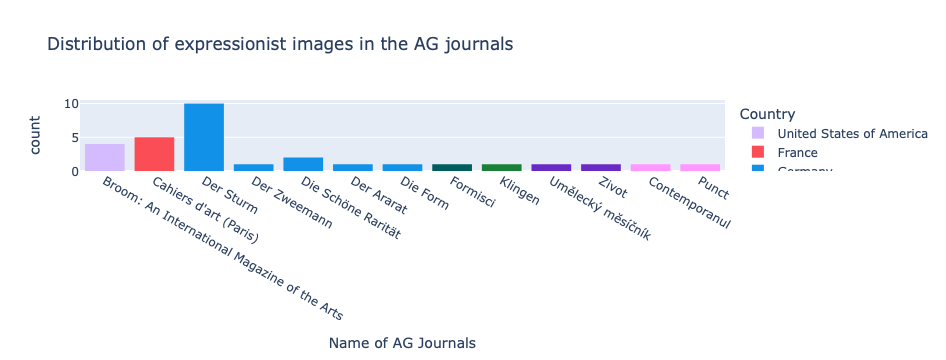

In [24]:
expressionism['count_journal'] = expressionism.groupby(['Title'])['manifest_url'].transform('count')
expressionism_ag = expressionism.loc[expressionism['Journal Type'] == 'Avant-garde Journal']

expressionism_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)

top_expressionism_ag = expressionism_ag[expressionism_ag['count_journal'] >= 4]

fig = px.histogram(expressionism_ag,  x='Title', color="Country",
            title="Distribution of expressionist images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/expressionism_j.png",  scale=3, width=2000) 
fig.write_html('viz/style/expressionism_j.html', auto_open=False)

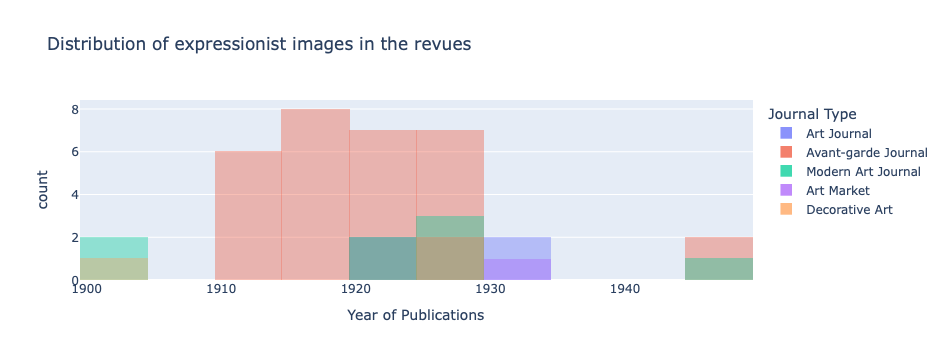

In [26]:
expressionism['year'] = pd.DatetimeIndex(expressionism['Date']).year
expressionism = expressionism.drop_duplicates(subset=['image_url'])
pre50 = (expressionism['year'] < 1950)
expressionism_pre_1950 = expressionism.loc[pre50]

fig = px.histogram(expressionism_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of expressionist images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_expressionism.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_expressionism.html', auto_open=False)

## Geometric Abstraction

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_11186/2677478566.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



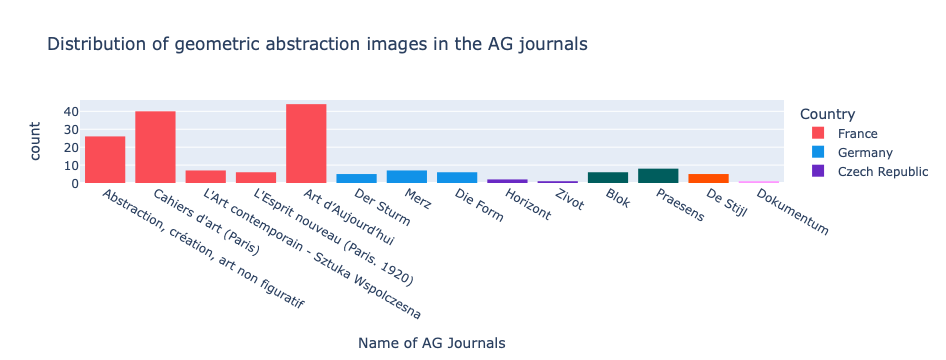

In [27]:
geometric_abstraction['count_journal'] = geometric_abstraction.groupby(['Title'])['manifest_url'].transform('count')
geometric_abstraction_ag = geometric_abstraction.loc[geometric_abstraction['Journal Type'] == 'Avant-garde Journal']

geometric_abstraction_ag.sort_values(by=['numero_cluster', 'Title'], ascending=True, inplace=True)

top_geometric_abstraction_ag = geometric_abstraction_ag[geometric_abstraction_ag['count_journal'] >= 4]

fig = px.histogram(geometric_abstraction_ag,  x='Title', color="Country",
            title="Distribution of geometric abstraction images in the AG journals",
                  labels={
                     "Title": "Name of AG Journals"},
                   color_discrete_map= {
                    "France": "#fa4d56",
                    "Germany": "#1192e8",
                    "Czech Republic": "#6929c4",
                    "Netherlands": "#FF4F00",
                    "Poland": "#005d5d",
                    "Denmark" : "#198038",
                    "United Kingdom": "#009d9a",
                   "United States of America": "#d4bbff"})
fig.update_traces(textfont_size=12, textangle=0, textposition="outside")
fig.show()
fig.write_image("viz/style/geometric_abstraction_j.png",  scale=3, width=2000) 
fig.write_html('viz/style/geometric_abstraction_j.html', auto_open=False)

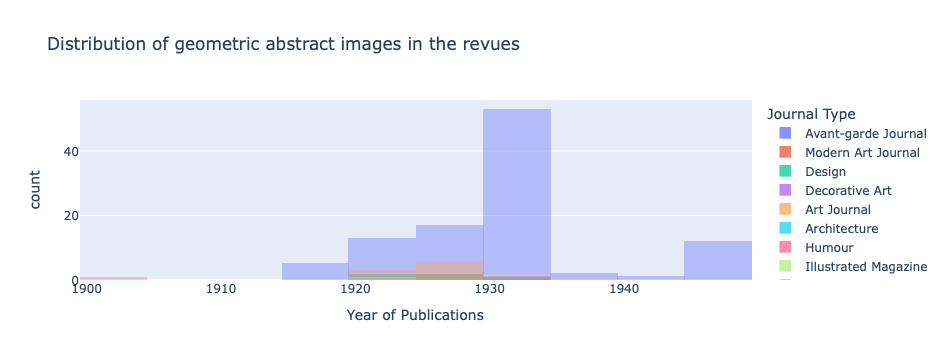

In [28]:
geometric_abstraction['year'] = pd.DatetimeIndex(geometric_abstraction['Date']).year
geometric_abstraction = geometric_abstraction.drop_duplicates(subset=['image_url'])
pre50 = (geometric_abstraction['year'] < 1950)
geometric_abstraction_pre_1950 = geometric_abstraction.loc[pre50]

fig = px.histogram(geometric_abstraction_pre_1950, x="year", color="Journal Type", barmode="overlay",
                   title="Distribution of geometric abstract images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/image_all_geometric_abstraction.png",  scale=3, width=2000) 
fig.write_html('viz/style/image_all_geometric_abstraction.html', auto_open=False)

# Global analysis

## All styles

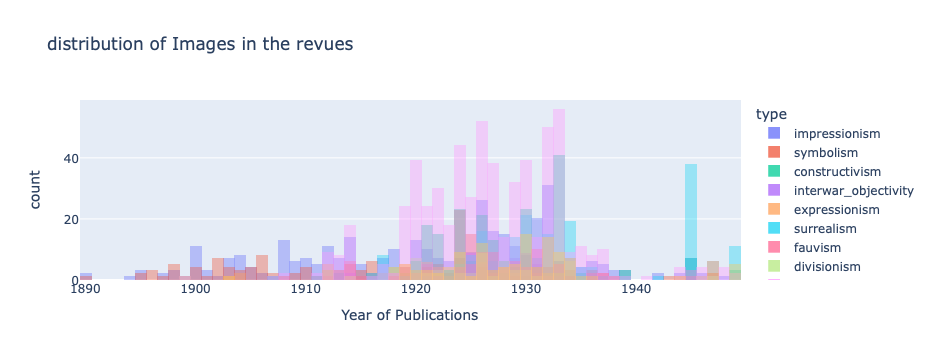

In [29]:
fig = px.histogram(df_pre_1950, x="year", color="type", barmode="overlay",
                   title="distribution of Images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/all_images.png",  scale=3, width=2000) 
fig.write_html('viz/style/all_images.html', auto_open=False)

## Only AG journals

In [30]:
df_pre_1950_ag = df_pre_1950.loc[df_pre_1950['Journal Type'] == 'Avant-garde Journal']

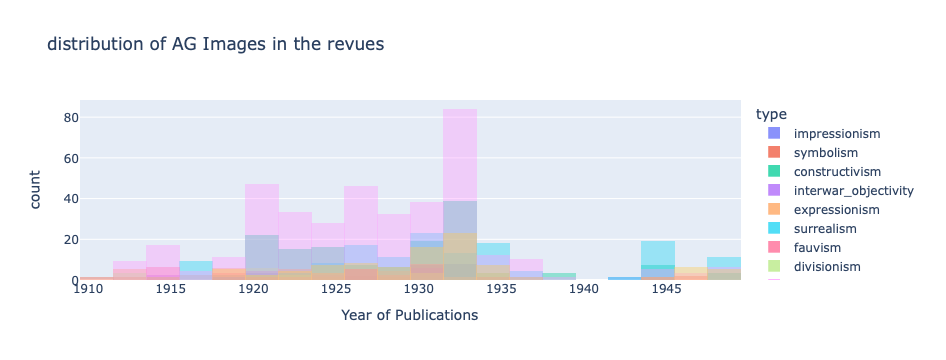

In [31]:
fig = px.histogram(df_pre_1950_ag, x="year", color="type", barmode="overlay",
                   title="distribution of AG Images in the revues",
                   labels={
                     "year": "Year of Publications"})
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("viz/style/ag_all_images.png",  scale=3, width=2000) 
fig.write_html('viz/style/ag_all_images.html', auto_open=False)